In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def init(q1 ,q2, dx, jmax):
  x = np.linspace(0, dx * (jmax - 1), jmax)
  q = np.array([(float(q1) if i < 0.5 * jmax else float(q2)) for i in range(jmax)])
  return (x, q)

In [3]:
def UPWIND1(q, c, dt, dx, j):
  return c * q[j]

In [4]:
def UPWIND2(q, c, dt, dx, j):
  return c * (1.5 * q[j] - 0.5 * q[j - 1])

In [8]:
def do_computing(x, q, c, dt, dx, nmax, ff, order=1, interval = 2, ylim = None, yticks = None):
  plt.figure(figsize=(7,7), dpi=100)
  plt.rcParams["font.size"] = 22

  plt.plot(x, q, marker='o', lw=2, label='n=0')

  for n in range(1, nmax + 1):
    qold = q.copy()
    for j in range(order, jmax - order):
      ff1 = ff(qold, c, dt, dx, j)
      ff2 = ff(qold, c, dt, dx, j-1)
      q[j] = qold[j] - dt / dx * (ff1 - ff2)

    if n % interval == 0:
      plt.plot(x, q, marker='o', lw=2, label=f'n={n}')

  plt.grid(color='black', linestyle='dashed', linewidth=0.5)
  plt.xlabel('x')
  plt.ylabel('q')
  plt.legend()
  if ylim is not None:
    plt.ylim(ylim)
  if yticks is not None:
    plt.yticks(yticks)
  plt.show()

In [9]:
c = 1
dt = 0.05
dx = 0.1

jmax = 21
nmax = 6

q1 = 1
q2 = 0
x, q = init(q1, q2, dx, jmax)

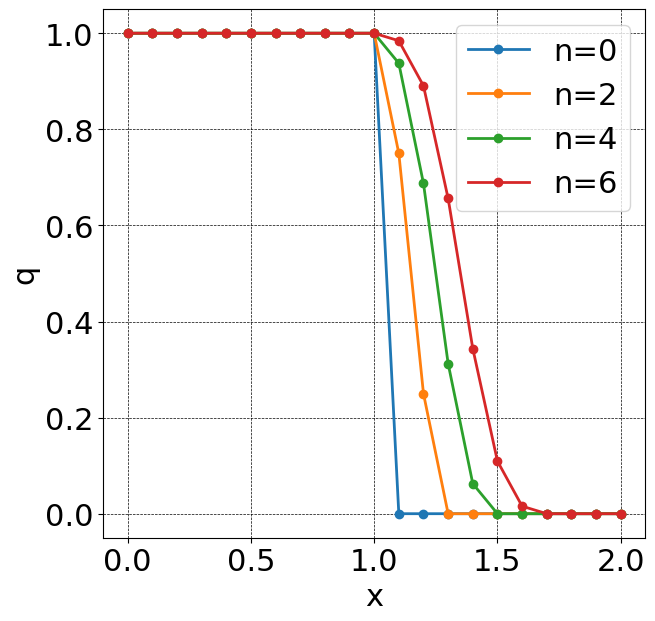

In [10]:
do_computing(x, q, c, dt, dx, nmax, UPWIND1, order=1, interval=2)

In [11]:
c = 1
dt = 0.05
dx = 0.1

jmax = 21
nmax = 6

q1 = 1
q2 = 0
x, q = init(q1, q2, dx, jmax)

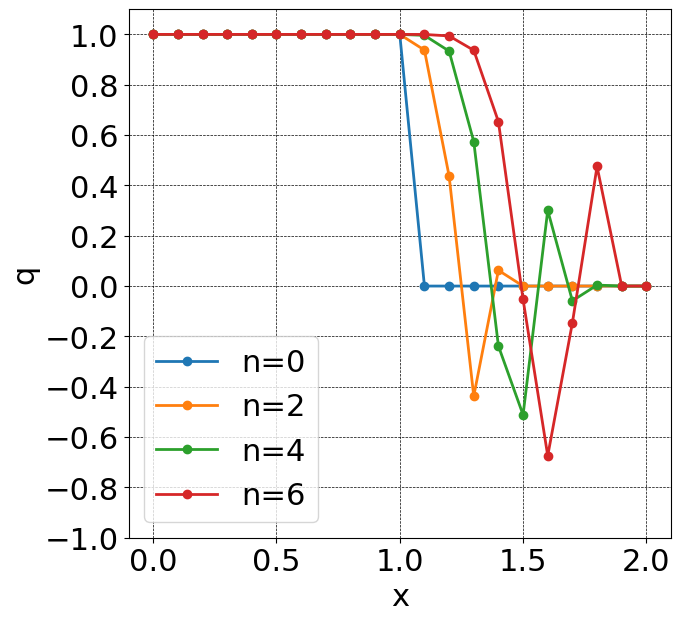

In [12]:
do_computing(x, q, c, dt, dx, nmax, UPWIND2, order=2, interval=2, \
             ylim=[-1, 1.1], \
            yticks=np.arange(-1, 1.1, 0.2))

In [13]:
def UPWIND1(q, c, dt, dx, j):
  ur = q[j + 1]
  ul = q[j]
  fr = c * ur
  fl = c * ul
  return 0.5 * (fr + fl - abs(c) * (ur - ul))

In [21]:
def UPWIND2(q, c, dt, dx, j):
  ur = 1.5 * q[j+1] - 0.5 * q[j+2]
  ul = 1.5 * q[j] - 0.5 * q[j-1]
  fr = c * ur
  fl = c * ul
  return 0.5 * (fr + fl - abs(c) * (ur - ul))

In [22]:
c = 1
dt = 0.05
dx = 0.1

jmax = 21
nmax = 6

q1 = 1
q2 = 0
x, q = init(q1, q2, dx, jmax)

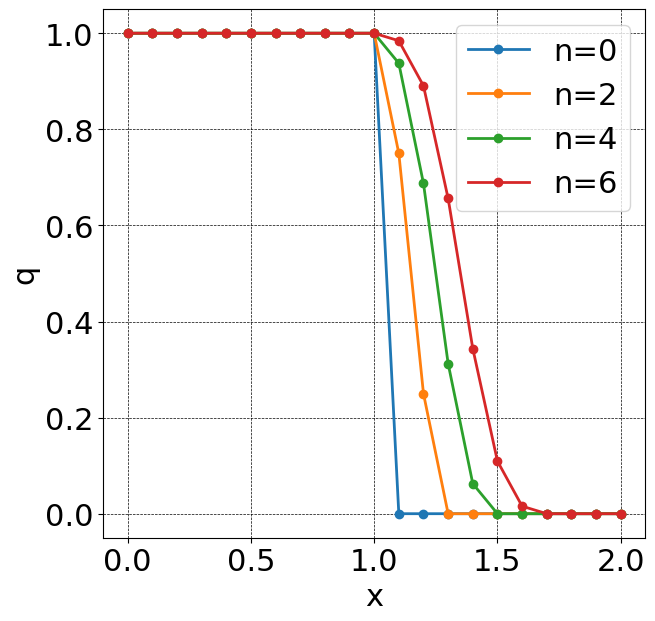

In [23]:
do_computing(x, q, c, dt, dx, nmax, UPWIND1, order=1, interval=2)

In [24]:
c = -1
dt = 0.05
dx = 0.1

jmax = 21
nmax = 6

q1 = 0
q2 = 1
x, q = init(q1, q2, dx, jmax)

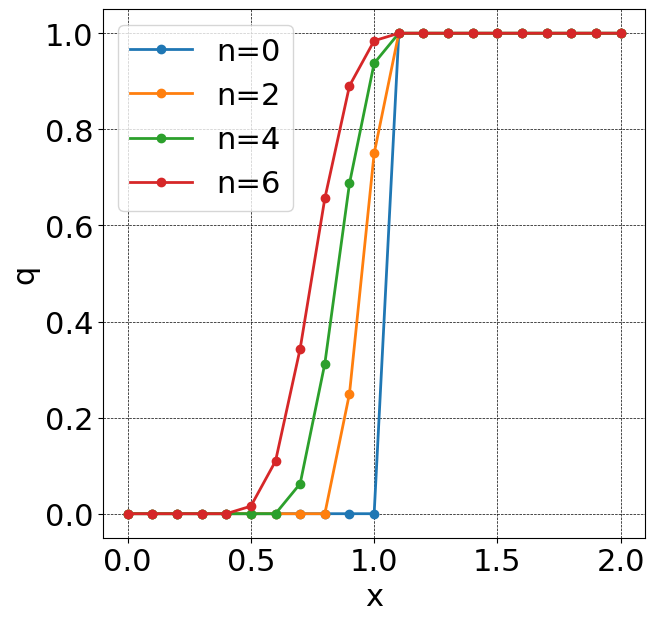

In [25]:
do_computing(x, q, c, dt, dx, nmax, UPWIND1, order=1, interval=2)

In [26]:
c = 1
dt = 0.05
dx = 0.1

jmax = 21
nmax = 6

q1 = 1
q2 = 0
x, q = init(q1, q2, dx, jmax)

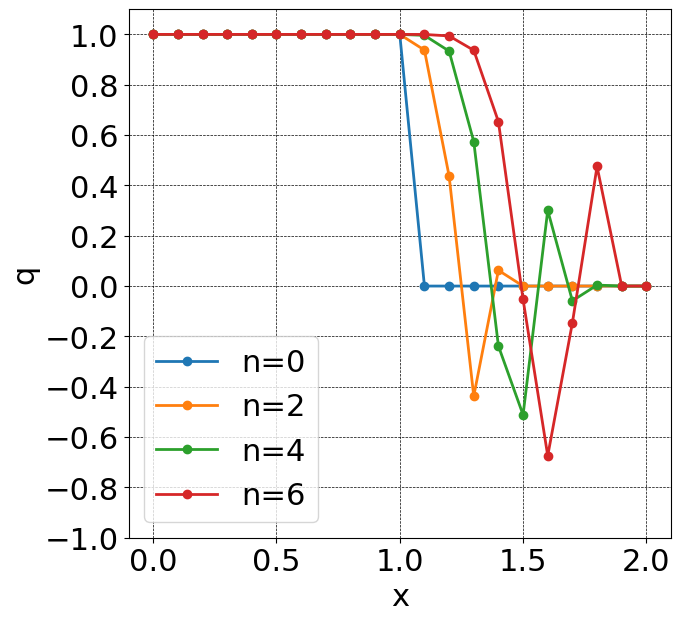

In [27]:
do_computing(x, q, c, dt, dx, nmax, UPWIND2, order=2, interval=2, \
             ylim=[-1, 1.1], \
             yticks=np.arange(-1, 1.1, 0.2))

In [28]:
c = -1
dt = 0.05
dx = 0.1

jmax = 21
nmax = 6

q1 = 0
q2 = 1
x, q = init(q1, q2, dx, jmax)

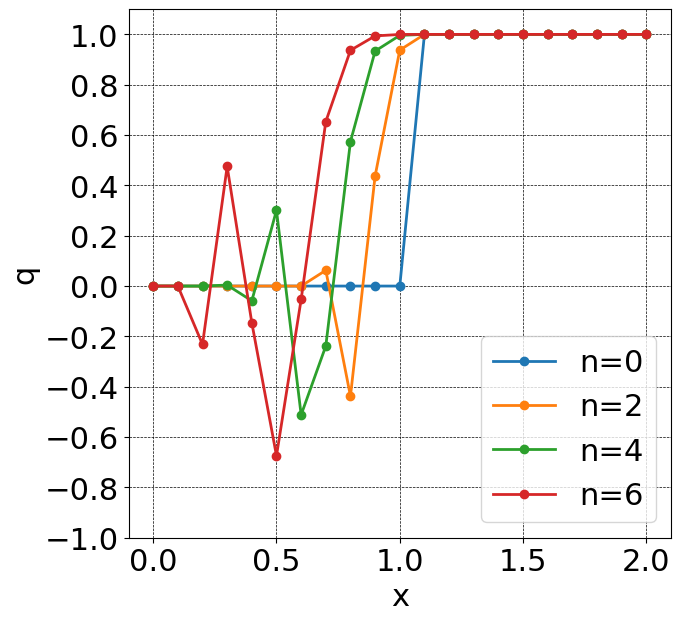

In [29]:
do_computing(x, q, c, dt, dx, nmax, UPWIND2, order=2, interval=2, \
             ylim = [-1, 1.1], \
             yticks=np.arange(-1, 1.1, 0.2))